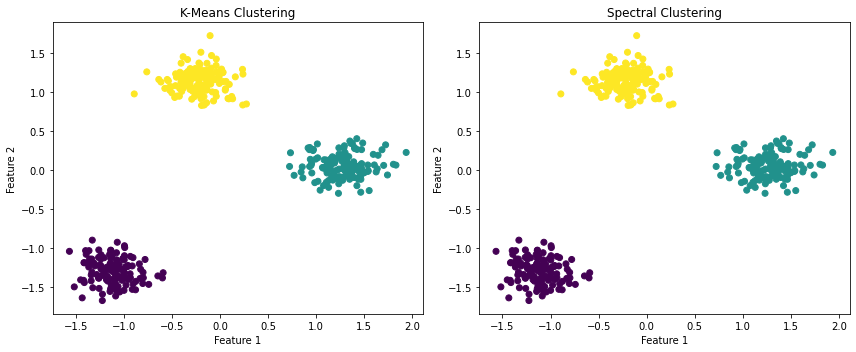

K-Means Silhouette Score: 0.8398509251453133
Spectral Silhouette Score: 0.8398509251453133


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import silhouette_score

# Generate data
X, _ = make_blobs(
    n_samples=500,
    centers=3,
    n_features=2,
    random_state=42
)

# Train-test split
X_train, X_test = train_test_split(
    X, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Spectral Clustering
spectral = SpectralClustering(
    n_clusters=3,
    assign_labels="discretize",
    random_state=42
)
y_pred_spectral = spectral.fit_predict(X_train_scaled)

# K-Means Clustering
kmeans = KMeans(
    n_clusters=3,
    max_iter=500,
    random_state=42
)
y_pred_kmeans = kmeans.fit_predict(X_train_scaled)

# Plot results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(
    X_train_scaled[:, 0],
    X_train_scaled[:, 1],
    c=y_pred_kmeans,
    cmap='viridis'
)
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.scatter(
    X_train_scaled[:, 0],
    X_train_scaled[:, 1],
    c=y_pred_spectral,
    cmap='viridis'
)
plt.title("Spectral Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

# Silhouette scores
print("K-Means Silhouette Score:",
      silhouette_score(X_train_scaled, y_pred_kmeans))

print("Spectral Silhouette Score:",
      silhouette_score(X_train_scaled, y_pred_spectral))

